In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from matplotlib.colors import ListedColormap


# Load the datasets
df = pd.read_csv('Zoo.csv')
# Exploratory Data Analysis (EDA)
print(df.describe(include='all'))
print(df.info())

# Handling Missing Values
df.fillna(0, inplace=True)  # Assuming no missing values as it's a small dataset

# Splitting the dataset into features and target variable
X = df.drop(columns=['animal name', 'type'])  # Features
y = df['type']  # Target

# Feature Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)





       animal name        hair    feathers        eggs        milk  \
count          101  101.000000  101.000000  101.000000  101.000000   
unique         100         NaN         NaN         NaN         NaN   
top           frog         NaN         NaN         NaN         NaN   
freq             2         NaN         NaN         NaN         NaN   
mean           NaN    0.425743    0.198020    0.584158    0.405941   
std            NaN    0.496921    0.400495    0.495325    0.493522   
min            NaN    0.000000    0.000000    0.000000    0.000000   
25%            NaN    0.000000    0.000000    0.000000    0.000000   
50%            NaN    0.000000    0.000000    1.000000    0.000000   
75%            NaN    1.000000    0.000000    1.000000    1.000000   
max            NaN    1.000000    1.000000    1.000000    1.000000   

          airborne     aquatic    predator     toothed    backbone  \
count   101.000000  101.000000  101.000000  101.000000  101.000000   
unique         NaN 

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune the value of K

# Train the model using the training sets
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

In [19]:
# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



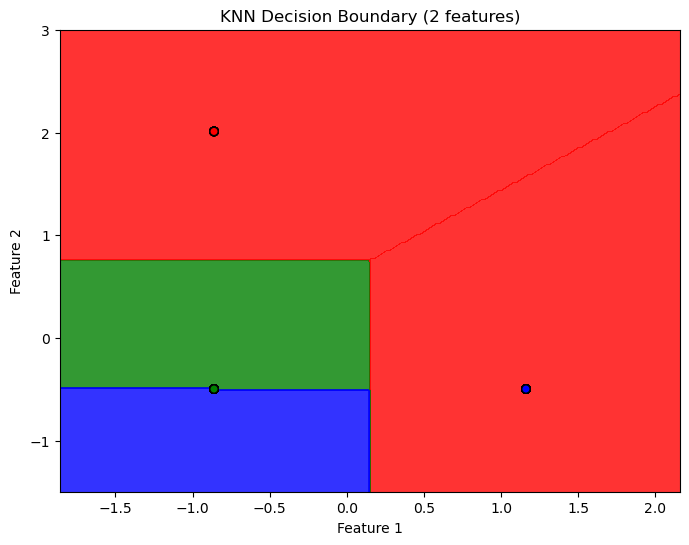

In [20]:

def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = .02  # step size in the mesh
    X = X[:, :2]  # we only take the first two features.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Using only first two features for visualization
X_train_2d = X_train[:, :2]
knn.fit(X_train_2d, y_train)
plot_decision_boundary(X_train_2d, y_train, knn, title="KNN Decision Boundary (2 features)")


In [21]:
# Trying different values of K
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f'For K={k}, Accuracy={accuracy_score(y_test, y_pred):.4f}')


For K=1, Accuracy=1.0000
For K=2, Accuracy=1.0000
For K=3, Accuracy=1.0000
For K=4, Accuracy=0.9524
For K=5, Accuracy=0.9524
For K=6, Accuracy=0.9524
For K=7, Accuracy=0.9524
For K=8, Accuracy=0.9524
For K=9, Accuracy=0.9048
For K=10, Accuracy=0.9048


## 1. What are the key hyperparameters in KNN?
K (number of neighbors): It determines the number of nearest neighbors to consider for classification.

Distance Metric: Commonly used metrics include Euclidean, Manhattan, and Minkowski distance.

Weighting Scheme: Neighbors can be weighted uniformly or based on their distance to the query point.

## 2. What distance metrics can be used in KNN?

Euclidean Distance: The straight-line distance between two points in Euclidean space.
    
Manhattan Distance: The sum of the absolute differences of their Cartesian coordinates.
    
Minkowski Distance: A generalized metric that includes both Euclidean and Manhattan distances as special cases.